## 1. Analisi dei dati

La fase introduttiva prevede la lettura e comprensione del dataset.
Incentreremo il nostro lavoro sulla risoluzione di alcune problematiche legate alla presenza di celle vuote e l'individuazione di correlazione tra la colonna target e le altre features.

In [91]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

### 1.1 LETTURA E COMPRENSIONE DEL DATASET

Implementiamo la libreria pandas in modo da poter modellare il dataset

In [92]:
steam_df = pd.read_csv("C:/Users/leomo/Desktop/Prog_Icon/dataset/originale/steam.csv")
steam_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [93]:
steam_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [94]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

### 1.2 Pre-processing del dataset

Dopo aver concluso la fase iniziale di analisi del dataset passiamo alla fase di pre-processing, nella quale effettueremo un cleaning dei dati.

In [95]:
columns_to_drop = [
    'appid', 'english', 'developer', 'publisher',
    'categories', 'platforms', 'required_age',
    'median_playtime', 'steamspy_tags'
]
steam_df = steam_df.drop(columns=columns_to_drop, errors='ignore')
steam_df.head()

,name,release_date,genres,achievements,positive_ratings,negative_ratings,average_playtime,owners,price
0,Counter-Strike,2000-11-01,Action,0,124534,3339,17612,10000000-20000000,7.19
1,Team Fortress Classic,1999-04-01,Action,0,3318,633,277,5000000-10000000,3.99
2,Day of Defeat,2003-05-01,Action,0,3416,398,187,5000000-10000000,3.99
3,Deathmatch Classic,2001-06-01,Action,0,1273,267,258,5000000-10000000,3.99
4,Half-Life: Opposing Force,1999-11-01,Action,0,5250,288,624,5000000-10000000,3.99


Sono state eliminate le seguenti colonne:
***'appid'***: identificatore tecnico non necessario per l’utente finale.

***'english'***: il dataset non si focalizza sulla lingua, la colonna è ridondante.

***'developer'***, ***'publisher'***: valori molto variabili e specifici, poco utili per raccomandazioni.

***'categories e steamspy_tags'***: informazioni simili già contenute in genres.

***'platforms'***: non considerato un criterio di raccomandazione in questo contesto.

***'required_age'***: dato poco rilevante per il nostro scopo.

***'median_playtime'***: sostituito da average_playtime, più adatto a misurare popolarità.

Procediamo a 'standardizzare' i valori presenti nella categoria 'id' cha saranno utili per il lavoro dello StandardScaler nel Recommender System.

In [96]:
df = pd.DataFrame(steam_df)
df['name'] = df['name'].str.replace('"', '', regex=False)
df['name'] = df['name'].str.replace("'", '', regex=False)

# Salvataggio dataset standardizzato
df.to_csv('steam_standard_dataset.csv', index=False)

Dall'analisi del dataset abbiamo osservato che alcune metriche numeriche, come ***'price'*** e ***'average_playtime'***, presentano valori che non risultano approssimati in maniera coerente.

In particolare, il campo ***'price'*** include valori con numerose cifre decimali, mentre ***'average_playtime'*** mostra numeri con valori molto elevati che non sono stati arrotondati all'unità.

Per garantire una maggiore uniformità e leggibilità del dataset — specialmente in vista di rappresentazioni grafiche e fasi successive del sistema di raccomandazione — abbiamo proceduto ad approssimare:

la colonna ***'price'*** a due cifre decimali

la colonna ***'average_playtime'*** a numeri interi

I dati sono stati poi salvati nel file steam_rounded_dataset.csv per un utilizzo coerente nelle fasi successive dell'analisi.

In [97]:
steam_df['price'].describe()

count    27075.000000
mean         6.078193
std          7.874922
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64

In [98]:
steam_df['average_playtime'].describe()

count     27075.000000
mean        149.804949
std        1827.038141
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      190625.000000
Name: average_playtime, dtype: float64

In [99]:
df = pd.read_csv('steam_standard_dataset.csv')
df['price'] = df['price'].round(2)
df['average_playtime'] = df['average_playtime'].round(0)
print(df[['price', 'average_playtime']].head(10).to_string(index=False))

df.to_csv('steam_rounded_dataset.csv', index=False)

 price  average_playtime
  7.19             17612
  3.99               277
  3.99               187
  3.99               258
  3.99               624
  3.99               175
  7.19              1300
  7.19               427
  3.99               361
  7.19               691


Procediamo a rinominare le colonne: ***'name'***,  ***'genres'***, ***'price'*** e ***'average_playtime'*** con i nuovi titoli di: ***'title'***, ***'genre'***, ***'game_price'*** e ***'avg_playtime'***.

In [100]:
df = pd.read_csv('steam_rounded_dataset.csv')
df.rename(columns={
    'name': 'title',
    'genres': 'genre',
    'price': 'game_price',
    'average_playtime': 'avg_playtime'
}, inplace=True)
df.to_csv('steam_renamed_dataset.csv', index=False)

### 1.2.1 Gestione delle celle null per ogni colonna

In [101]:
steam_df.isnull().sum()

name                0
release_date        0
genres              0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
owners              0
price               0
dtype: int64

Da questa funzione risulta che il nostro dataset non presenta alcun valore nullo da gestire.

***Istogramma che rappresenta la distribuzione dei giochi per fascia di prezzo presenti nel dataset***

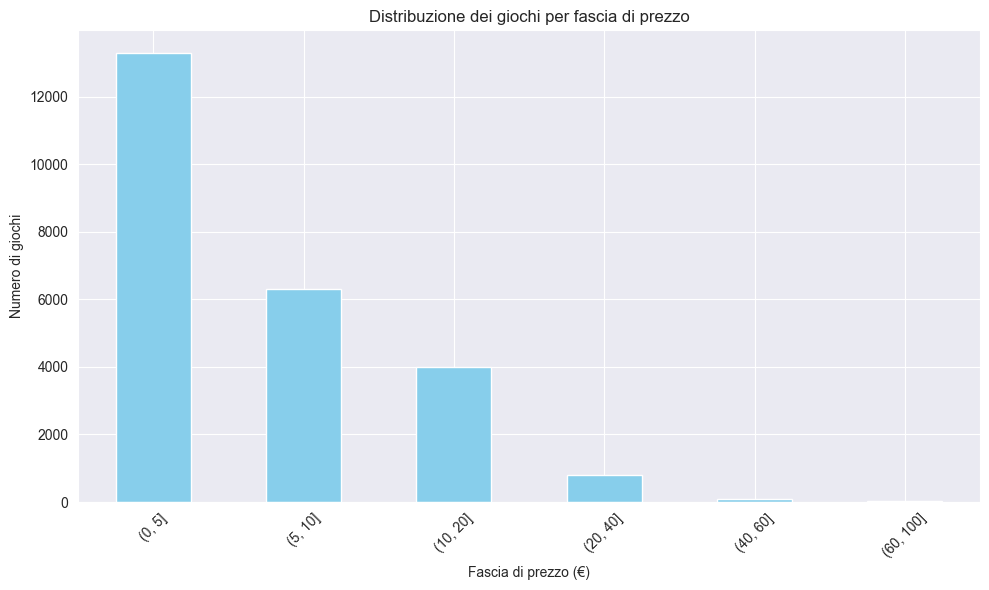

In [102]:
df = pd.read_csv("steam_renamed_dataset.csv")

# Fasce di prezzo
price_bins = pd.cut(df['game_price'], bins=[0, 5, 10, 20, 40, 60, 100])
price_counts = price_bins.value_counts().sort_index()

# Istogramma
plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuzione dei giochi per fascia di prezzo')
plt.xlabel('Fascia di prezzo (€)')
plt.ylabel('Numero di giochi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Dall'istogramma generato possiamo osservare la distribuzione dei videogiochi tra diverse fasce di prezzo.
Si nota una netta concentrazione di titoli nella fascia 0–5€, suggerendo che la maggior parte dei giochi su Steam siano economici o gratuiti.
Le fasce più alte (oltre i 40€) contengono un numero molto ridotto di titoli, il che indica che le raccomandazioni di prezzo più elevato saranno statisticamente meno frequenti.

***Grafico a violino che mostra la distribuzione dei valori prezzo e tempo medio di gioco***

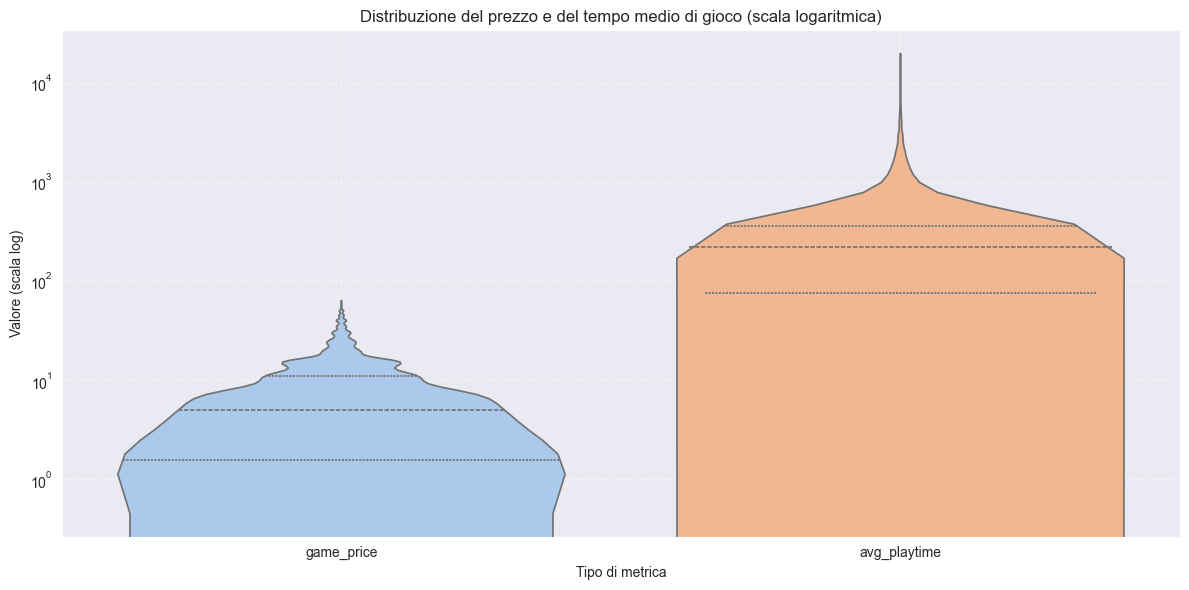

In [103]:
df = pd.read_csv("steam_renamed_dataset.csv")

# Filtro outlier e dati non validi
df_filtered = df[(df['avg_playtime'] > 0) & (df['avg_playtime'] < 20000) & (df['game_price'] < 100)]

# Melt per struttura long
df_long = pd.melt(df_filtered, id_vars=['title'], value_vars=['game_price', 'avg_playtime'],
                  var_name='feature', value_name='value')

plt.figure(figsize=(12, 6))
sns.violinplot(x='feature', y='value', hue='feature', data=df_long, inner='quartile', palette='pastel', legend=False)


plt.yscale('log')
plt.title('Distribuzione del prezzo e del tempo medio di gioco (scala logaritmica)')
plt.xlabel('Tipo di metrica')
plt.ylabel('Valore (scala log)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


L'uso della scala logaritmica sull'asse verticale consente di evidenziare meglio la distribuzione dei dati, che altrimenti risulterebbe troppo sbilanciata a causa degli outlier, in particolare nei valori di avg_playtime.

Per quanto riguarda ***'game_price'***, osserviamo una distribuzione asimmetrica e concentrata verso valori molto bassi: la maggior parte dei giochi si colloca tra 0 e 10 euro, con pochi titoli che superano i 20 euro. Questo indica che la piattaforma Steam ospita una grande quantità di giochi economici o addirittura gratuiti.

In merito a ***'avg_playtime'***, la distribuzione è molto più dispersa: la maggior parte dei giochi presenta un tempo medio inferiore alle 100 ore, ma esistono titoli con playtime medio che supera le 10.000 ore, tipicamente legati a esperienze multiplayer o molto longeve (es. MMORPG, sandbox).


***Grafico che rappresenta la distribuzione del prezzo medio per genere***

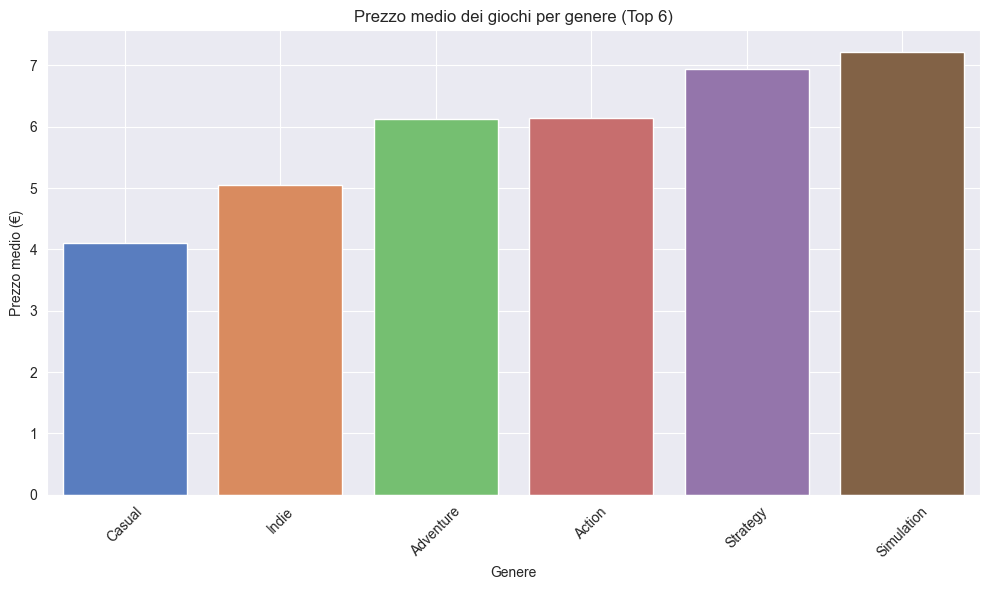

In [104]:
df = pd.read_csv("steam_renamed_dataset.csv")

# Separazione dei generi multipli
df['genre'] = df['genre'].astype(str)
df_genres = df.assign(genre=df['genre'].str.split(';')).explode('genre')

# Trova i 6 generi più frequenti
top_genres = df_genres['genre'].value_counts().nlargest(6).index

# Filtra e calcola il prezzo medio
df_top = df_genres[df_genres['genre'].isin(top_genres)]
avg_price = df_top.groupby('genre')['game_price'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.index, y=avg_price.values, hue=avg_price.index, palette='muted', legend=False)

# Etichette
plt.title('Prezzo medio dei giochi per genere (Top 6)')
plt.ylabel('Prezzo medio (€)')
plt.xlabel('Genere')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Si osserva che i generi Simulation e Strategy presentano il prezzo medio più elevato tra i top 6, suggerendo che molti dei titoli appartenenti a queste categorie abbiano una maggiore complessità, profondità di gameplay e, in alcuni casi, una nicchia di utenza disposta a spendere di più per esperienze più tecniche o gestionali.

Adventure e Action si posizionano nella fascia media di prezzo, indicando una buona varietà di titoli che spaziano da produzioni indipendenti fino a giochi di medio-alto profilo. La presenza in questa fascia riflette anche la loro ampia diffusione e popolarità, che bilancia produzioni economiche con titoli di fascia più alta.

I generi Indie e Casual evidenziano invece un prezzo medio inferiore, coerentemente con il fatto che si tratta spesso di giochi sviluppati da studi indipendenti, caratterizzati da esperienze di gioco più brevi, accessibili e con costi di produzione contenuti. Questi generi rappresentano una proposta più economica per l'utente, ma non per questo meno interessante in termini di creatività e innovazione.

### 1.3 Individuazione di eventuali correlazioni

In [105]:
df = pd.read_csv("steam_renamed_dataset.csv")
df = df.dropna(subset=['genre'])

# Separazione dei generi multipli per ogni gioco
all_genres = df['genre'].str.split(';')
exploded = all_genres.explode()

# Conteggio dei giochi per genere singolo
genre_counts = exploded.value_counts().reset_index()
genre_counts.columns = ['genre', 'number_of_games']
print(genre_counts)


                    genre  number_of_games
0                   Indie            19421
1                  Action            11903
2                  Casual            10210
3               Adventure            10032
4                Strategy             5247
5              Simulation             5194
6                     RPG             4311
7            Early Access             2954
8            Free to Play             1704
9                  Sports             1322
10                 Racing             1024
11                Violent              843
12  Massively Multiplayer              723
13                   Gore              537
14                 Nudity              266
15         Sexual Content              245
16              Utilities              146
17  Design & Illustration               87
18   Animation & Modeling               79
19              Education               51
20       Video Production               38
21      Software Training               31
22       Au

***Confronto della distribuzione dei generi nei giochi gratuiti vs a pagamento***

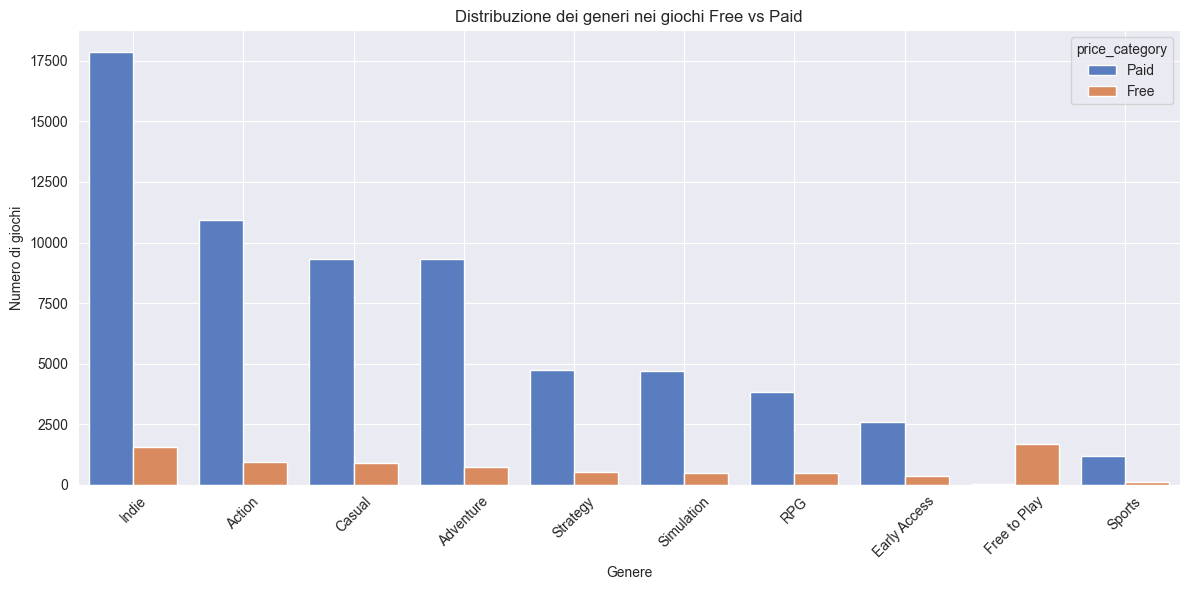

In [106]:
import matplotlib.pyplot as plt
df = pd.read_csv("steam_renamed_dataset.csv")
# Rimuove righe con genere nullo
df = df.dropna(subset=['genre'])
# Crea colonna di categoria prezzo
df['price_category'] = df['game_price'].apply(lambda x: 'Free' if x == 0 else 'Paid')
# Divide i generi multipli in righe singole
df_exploded = df.assign(genre_split=df['genre'].str.split(';')).explode('genre_split')
# Ottieni i 10 generi più comuni
top_genres = df_exploded['genre_split'].value_counts().nlargest(10).index
df_top = df_exploded[df_exploded['genre_split'].isin(top_genres)]

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='genre_split', hue='price_category', order=top_genres, palette='muted')

plt.title('Distribuzione dei generi nei giochi Free vs Paid')
plt.xlabel('Genere')
plt.ylabel('Numero di giochi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
df = pd.read_csv("steam_renamed_dataset.csv")

# Classifica i giochi in Free o Paid
df['price_category'] = df['game_price'].apply(lambda x: 'Free' if x == 0 else 'Paid')
df = df.dropna(subset=['genre'])
df['genre_split'] = df['genre'].str.split(';')
df_exploded = df.explode('genre_split')

# Raggruppa per categoria di prezzo e genere
genre_counts = df_exploded.groupby(['price_category', 'genre_split']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(genre_counts.head(10))

   price_category   genre_split  count
40           Paid         Indie  17864
28           Paid        Action  10946
32           Paid        Casual   9316
29           Paid     Adventure   9300
50           Paid      Strategy   4731
47           Paid    Simulation   4709
44           Paid           RPG   3835
35           Paid  Early Access   2605
9            Free  Free to Play   1671
12           Free         Indie   1557
